<a href="https://colab.research.google.com/github/ArchanaaDinakaran/Arch/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("Loan_approval_data_2025.csv")

df.columns = df.columns.str.strip()


In [16]:
le = LabelEncoder()

categorical_cols = [
    'occupation_status',
    'product_type',
    'loan_intent',
    'loan_status'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])




In [18]:
X = df.drop(['loan_status', 'customer_id'], axis=1)
y = df['loan_status']



In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
dt = DecisionTreeClassifier(
    criterion='gini',     # or 'entropy'
    max_depth=5,          # prevents overfitting
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 85.2 %

Confusion Matrix:
 [[3479 1030]
 [ 450 5041]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      4509
           1       0.83      0.92      0.87      5491

    accuracy                           0.85     10000
   macro avg       0.86      0.84      0.85     10000
weighted avg       0.86      0.85      0.85     10000



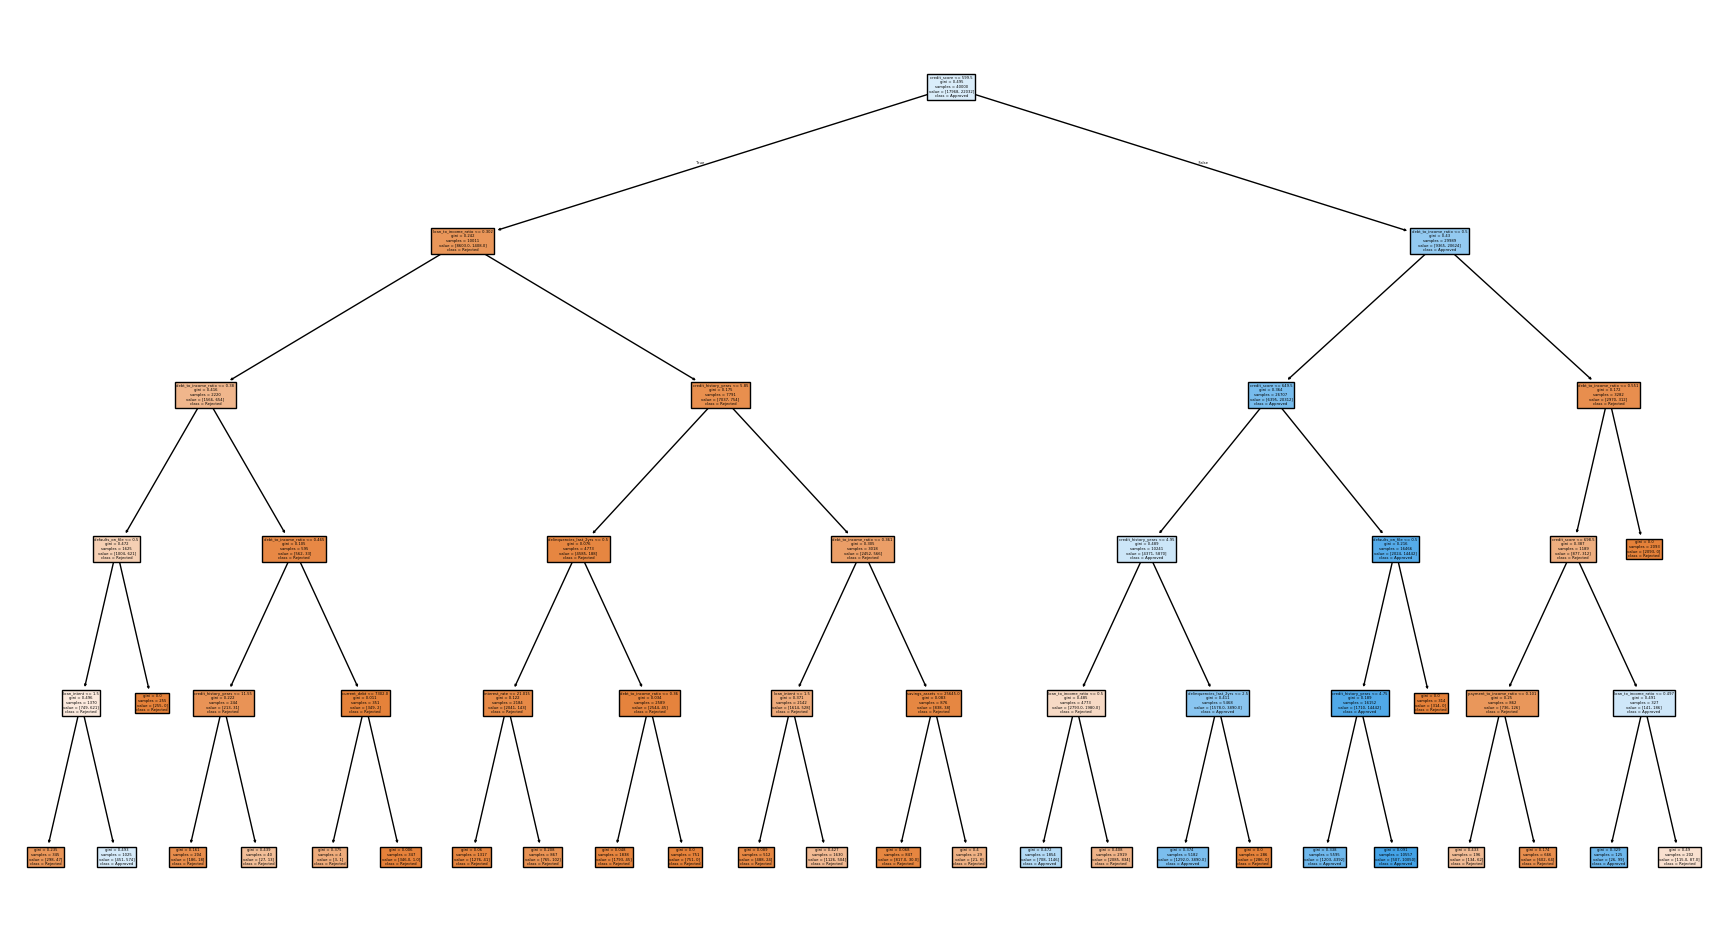

In [22]:
plt.figure(figsize=(22, 12))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Rejected", "Approved"],
    filled=True
)
plt.show()
